# Image Classification
In this project, you'll classify images from the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).  The dataset consists of airplanes, dogs, cats, and other objects. You'll preprocess the images, then train a convolutional neural network on all the samples. The images need to be normalized and the labels need to be one-hot encoded.  You'll get to apply what you learned and build a convolutional, max pooling, dropout, and fully connected layers.  At the end, you'll get to see your neural network's predictions on the sample images.
## Get the Data
Run the following cell to download the [CIFAR-10 dataset for python](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz).

In [1]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm
import problem_unittests as tests
import tarfile

cifar10_dataset_folder_path = 'cifar-10-batches-py'

# Use Floyd's cifar-10 dataset if present
floyd_cifar10_location = '/input/cifar-10/python.tar.gz'
if isfile(floyd_cifar10_location):
    tar_gz_path = floyd_cifar10_location
else:
    tar_gz_path = 'cifar-10-python.tar.gz'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile(tar_gz_path):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='CIFAR-10 Dataset') as pbar:
        urlretrieve(
            'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
            tar_gz_path,
            pbar.hook)

if not isdir(cifar10_dataset_folder_path):
    with tarfile.open(tar_gz_path) as tar:
        tar.extractall()
        tar.close()


tests.test_folder_path(cifar10_dataset_folder_path)

All files found!


## Explore the Data
The dataset is broken into batches to prevent your machine from running out of memory.  The CIFAR-10 dataset consists of 5 batches, named `data_batch_1`, `data_batch_2`, etc.. Each batch contains the labels and images that are one of the following:
* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck

Understanding a dataset is part of making predictions on the data.  Play around with the code cell below by changing the `batch_id` and `sample_id`. The `batch_id` is the id for a batch (1-5). The `sample_id` is the id for a image and label pair in the batch.

Ask yourself "What are all possible labels?", "What is the range of values for the image data?", "Are the labels in order or random?".  Answers to questions like these will help you preprocess the data and end up with better predictions.


Stats of batch 3:
Samples: 10000
Label Counts: {0: 994, 1: 1042, 2: 965, 3: 997, 4: 990, 5: 1029, 6: 978, 7: 1015, 8: 961, 9: 1029}
First 20 Labels: [8, 5, 0, 6, 9, 2, 8, 3, 6, 2, 7, 4, 6, 9, 0, 0, 7, 3, 7, 2]

Example of Image 1:
Image - Min Value: 15 Max Value: 249
Image - Shape: (32, 32, 3)
Label - Label Id: 5 Name: dog


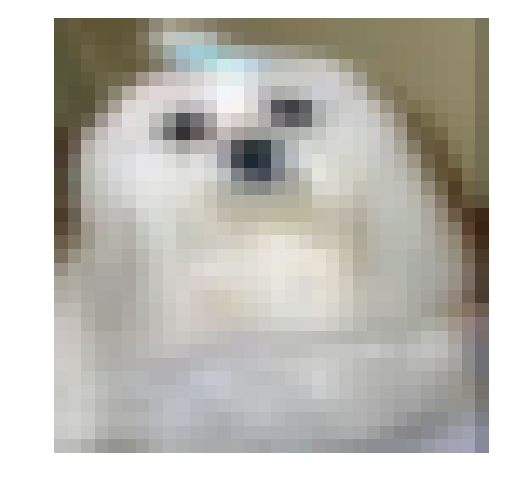

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper
import numpy as np

# Explore the dataset
batch_id = 3
sample_id = 1
helper.display_stats(cifar10_dataset_folder_path, batch_id, sample_id)

## Implement Preprocess Functions
### Normalize
In the cell below, implement the `normalize` function to take in image data, `x`, and return it as a normalized Numpy array. The values should be in the range of 0 to 1, inclusive.  The return object should be the same shape as `x`.

In [3]:
import numpy as np
from sklearn import preprocessing

def normalize(x):
    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.  The image shape is (32, 32, 3)
    : x: ({Number of images} , {Height} , {Width} , {Layers(colors)})
    : return: Numpy array of normalize data
    """
    # TODO: Implement Function
    """
    #Method 1 : Using simplest normalization
    normalized = x/255
   
   """
    #method 2 :
    a = 0.0
    b = 1.0
    normalized = a + ( ( (x - np.min(x))*(b - a) )/( np.max(x) - np.min(x) ) )

    
    return normalized


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_normalize(normalize)

Tests Passed


### One-hot encode
Just like the previous code cell, you'll be implementing a function for preprocessing.  This time, you'll implement the `one_hot_encode` function. The input, `x`, are a list of labels.  Implement the function to return the list of labels as One-Hot encoded Numpy array.  The possible values for labels are 0 to 9. The one-hot encoding function should return the same encoding for each value between each call to `one_hot_encode`.  Make sure to save the map of encodings outside the function.

Hint: Don't reinvent the wheel.

In [4]:
from sklearn import preprocessing
#encoder = None
def one_hot_encode(x):
    
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
    return np.eye(10)[x]
    #create the encoder - hard way
    """
    global encoder
    if encoder is not None:
        #if the given lable has less than 10 values, we do not initiate encoder creation again, we would transform
        #the array to it's one-hot encoded form based on lables
        return encoder.transform(x)
    else:
        encoder = preprocessing.LabelBinarizer()
        #Fuind one-hot vactor values
        encoder.fit(x)
        #transform and return the one-hot encoded lables
        return encoder.transform(x)
    """


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_one_hot_encode(one_hot_encode)

Tests Passed


### Randomize Data
As you saw from exploring the data above, the order of the samples are randomized.  It doesn't hurt to randomize it again, but you don't need to for this dataset.

## Preprocess all the data and save it
Running the code cell below will preprocess all the CIFAR-10 data and save it to file. The code below also uses 10% of the training data for validation.

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# Preprocess Training, Validation, and Testing Data
helper.preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)

# Check Point
This is your first checkpoint.  If you ever decide to come back to this notebook or have to restart the notebook, you can start from here.  The preprocessed data has been saved to disk.

In [6]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import pickle
import problem_unittests as tests
import helper

# Load the Preprocessed Validation data
valid_features, valid_labels = pickle.load(open('preprocess_validation.p', mode='rb'))

## Build the network
For the neural network, you'll build each layer into a function.  Most of the code you've seen has been outside of functions. To test your code more thoroughly, we require that you put each layer in a function.  This allows us to give you better feedback and test for simple mistakes using our unittests before you submit your project.

>**Note:** If you're finding it hard to dedicate enough time for this course each week, we've provided a small shortcut to this part of the project. In the next couple of problems, you'll have the option to use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages to build each layer, except the layers you build in the "Convolutional and Max Pooling Layer" section.  TF Layers is similar to Keras's and TFLearn's abstraction to layers, so it's easy to pickup.

>However, if you would like to get the most out of this course, try to solve all the problems _without_ using anything from the TF Layers packages. You **can** still use classes from other packages that happen to have the same name as ones you find in TF Layers! For example, instead of using the TF Layers version of the `conv2d` class, [tf.layers.conv2d](https://www.tensorflow.org/api_docs/python/tf/layers/conv2d), you would want to use the TF Neural Network version of `conv2d`, [tf.nn.conv2d](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d). 

Let's begin!

### Input
The neural network needs to read the image data, one-hot encoded labels, and dropout keep probability. Implement the following functions
* Implement `neural_net_image_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `image_shape` with batch size set to `None`.
 * Name the TensorFlow placeholder "x" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_label_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `n_classes` with batch size set to `None`.
 * Name the TensorFlow placeholder "y" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_keep_prob_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) for dropout keep probability.
 * Name the TensorFlow placeholder "keep_prob" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).

These names will be used at the end of the project to load your saved model.

Note: `None` for shapes in TensorFlow allow for a dynamic size.

In [7]:
import tensorflow as tf

def neural_net_image_input(image_shape):
    """
    Return a Tensor for a batch of image input
    : image_shape: Shape of the images
    : return: Tensor for image input.
    """
    # TODO: Implement Function
    return tf.placeholder(tf.float32,[None, image_shape[0], 
                                      image_shape[1], image_shape[2]], name="x")



def neural_net_label_input(n_classes):
    """
    Return a Tensor for a batch of label input
    : n_classes: Number of classes
    : return: Tensor for label input.
    """
    # TODO: Implement Function
    return tf.placeholder(tf.float32,[None, n_classes], name="y")


def neural_net_keep_prob_input():
    """
    Return a Tensor for keep probability
    : return: Tensor for keep probability.
    """
    # TODO: Implement Function
    return tf.placeholder(tf.float32, name="keep_prob")


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tf.reset_default_graph()
tests.test_nn_image_inputs(neural_net_image_input)
tests.test_nn_label_inputs(neural_net_label_input)
tests.test_nn_keep_prob_inputs(neural_net_keep_prob_input)

Image Input Tests Passed.
Label Input Tests Passed.
Keep Prob Tests Passed.


### Convolution and Max Pooling Layer
Convolution layers have a lot of success with images. For this code cell, you should implement the function `conv2d_maxpool` to apply convolution then max pooling:
* Create the weight and bias using `conv_ksize`, `conv_num_outputs` and the shape of `x_tensor`.
* Apply a convolution to `x_tensor` using weight and `conv_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.
* Add bias
* Add a nonlinear activation to the convolution.
* Apply Max Pooling using `pool_ksize` and `pool_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.

**Note:** You **can't** use [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) for **this** layer, but you can still use TensorFlow's [Neural Network](https://www.tensorflow.org/api_docs/python/tf/nn) package. You may still use the shortcut option for all the **other** layers.

In [8]:
def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_ksize: kernal size 2-D Tuple for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param pool_ksize: kernal size 2-D Tuple for pool
    :param pool_strides: Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
    # TODO: Implement Function
    # Image Properties
#     image_width = int(x_tensor.get_shape()[1])
#     image_height = int(x_tensor.get_shape()[2])
    color_channels =  int(x_tensor.get_shape()[3])
    # Convolution filter
    filter_size_width = int(conv_ksize[0])
    filter_size_height = int(conv_ksize[1])

    weight = tf.Variable(tf.truncated_normal(shape=[filter_size_height, filter_size_width, 
                                              color_channels, conv_num_outputs]
                                            ,
                                             stddev=np.sqrt(2/x_tensor.shape[-1].value)
                                            ))
    
    bias = tf.Variable(tf.zeros(conv_num_outputs))
    conv_layer = tf.nn.conv2d(x_tensor, weight
                              , strides=[1,int(conv_strides[0])
                                         ,int(conv_strides[1]),1], padding='SAME')
    # Add bias
    conv_layer = tf.nn.bias_add(conv_layer, bias)
    # Apply activation function
    conv_layer = tf.nn.max_pool(conv_layer,
                                ksize=[1,int(pool_ksize[0]),
                                       int(pool_ksize[1]),1],
                                strides=[1,int(pool_strides[0]),
                                         int(pool_strides[1]),1], padding='SAME')
    conv_layer = tf.nn.relu(conv_layer)

    return conv_layer 


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_con_pool(conv2d_maxpool)

Tests Passed


### Flatten Layer
Implement the `flatten` function to change the dimension of `x_tensor` from a 4-D tensor to a 2-D tensor.  The output should be the shape (*Batch Size*, *Flattened Image Size*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [9]:
def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    # TODO: Implement Function

    return tf.contrib.layers.flatten(x_tensor)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_flatten(flatten)

Tests Passed


### Fully-Connected Layer
Implement the `fully_conn` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [10]:
def fully_conn(x_tensor, num_outputs):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    return tf.contrib.layers.fully_connected(inputs=x_tensor, 
                                             num_outputs=num_outputs,
                                             activation_fn=tf.nn.relu)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_fully_conn(fully_conn)

Tests Passed


### Output Layer
Implement the `output` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

**Note:** Activation, softmax, or cross entropy should **not** be applied to this.

In [11]:
def output(x_tensor, num_outputs):
    """
    Apply a output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    return tf.contrib.layers.fully_connected(inputs=x_tensor, 
                                                     num_outputs=num_outputs, 
                                                     activation_fn=None)



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_output(output)

Tests Passed


### Create Convolutional Model
Implement the function `conv_net` to create a convolutional neural network model. The function takes in a batch of images, `x`, and outputs logits.  Use the layers you created above to create this model:

* Apply 1, 2, or 3 Convolution and Max Pool layers
* Apply a Flatten Layer
* Apply 1, 2, or 3 Fully Connected Layers
* Apply an Output Layer
* Return the output
* Apply [TensorFlow's Dropout](https://www.tensorflow.org/api_docs/python/tf/nn/dropout) to one or more layers in the model using `keep_prob`. 

In [12]:
def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    # TODO: Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    #conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    conv1 = conv2d_maxpool(x, 32, (3,3), (1,1), (2,2), (2,2))
    conv2 = conv2d_maxpool(conv1, 64, (3,3), (1,1), (2,2), (2,2))
    conv3 = conv2d_maxpool(conv2,128,(3,3),(1,1),(2,2),(2,2))

    # TODO: Apply a Flatten Layer
    # Function Definition from Above:
    flat1 = flatten(conv2)
    fc1 = fully_conn(flat1, 512)
    fc1 = tf.nn.dropout(fc1, keep_prob)
    fc2 = fully_conn(fc1, 256)
    fc2 = tf.nn.dropout(fc2, keep_prob)
    fc3 = fully_conn(fc2, 128)
    fc3 = tf.nn.dropout(fc3, keep_prob)
    out = output(fc3,10)
    return out

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tests.test_conv_net(conv_net)

Neural Network Built!


## Train the Neural Network
### Single Optimization
Implement the function `train_neural_network` to do a single optimization.  The optimization should use `optimizer` to optimize in `session` with a `feed_dict` of the following:
* `x` for image input
* `y` for labels
* `keep_prob` for keep probability for dropout

This function will be called for each batch, so `tf.global_variables_initializer()` has already been called.

Note: Nothing needs to be returned. This function is only optimizing the neural network.

In [13]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : keep_probability: keep probability
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    """
    # TODO: Implement Function
    session.run(optimizer, feed_dict={x: feature_batch, y: label_batch, keep_prob: keep_probability})



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_train_nn(train_neural_network)

Tests Passed


### Show Stats
Implement the function `print_stats` to print loss and validation accuracy.  Use the global variables `valid_features` and `valid_labels` to calculate validation accuracy.  Use a keep probability of `1.0` to calculate the loss and validation accuracy.

In [14]:
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    # TODO: Implement Function
    loss = session.run(cost, feed_dict = {x: feature_batch,y: label_batch, keep_prob: 1.0})
    acc = session.run(accuracy,feed_dict = {x: valid_features, y: valid_labels, keep_prob: 1.0})
    print('Loss at {}'.format(loss), 'Validation Accuracy at {}'.format(acc))


### Hyperparameters
Tune the following parameters:
* Set `epochs` to the number of iterations until the network stops learning or start overfitting
* Set `batch_size` to the highest number that your machine has memory for.  Most people set them to common sizes of memory:
 * 64
 * 128
 * 256
 * ...
* Set `keep_probability` to the probability of keeping a node using dropout

In [15]:
# TODO: Tune Parameters
epochs = 256
batch_size = 64
keep_probability = 0.5

### Train on a Single CIFAR-10 Batch
Instead of training the neural network on all the CIFAR-10 batches of data, let's use a single batch. This should save time while you iterate on the model to get a better accuracy.  Once the final validation accuracy is 50% or greater, run the model on all the data in the next section.

In [16]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...
Epoch  1, CIFAR-10 Batch 1:  Loss at 2.284106731414795 Validation Accuracy at 0.1629999876022339
Epoch  2, CIFAR-10 Batch 1:  Loss at 2.2556684017181396 Validation Accuracy at 0.18639998137950897
Epoch  3, CIFAR-10 Batch 1:  Loss at 2.1882479190826416 Validation Accuracy at 0.18679998815059662
Epoch  4, CIFAR-10 Batch 1:  Loss at 2.1115329265594482 Validation Accuracy at 0.22579997777938843
Epoch  5, CIFAR-10 Batch 1:  Loss at 2.0256733894348145 Validation Accuracy at 0.25620001554489136
Epoch  6, CIFAR-10 Batch 1:  Loss at 1.987401008605957 Validation Accuracy at 0.2637999951839447
Epoch  7, CIFAR-10 Batch 1:  Loss at 1.9805595874786377 Validation Accuracy at 0.284199982881546
Epoch  8, CIFAR-10 Batch 1:  Loss at 1.959415078163147 Validation Accuracy at 0.29679998755455017
Epoch  9, CIFAR-10 Batch 1:  Loss at 1.9179978370666504 Validation Accuracy at 0.3046000003814697
Epoch 10, CIFAR-10 Batch 1:  Loss at 1.906767725944519 Validation Accuracy

Epoch 84, CIFAR-10 Batch 1:  Loss at 0.3380490839481354 Validation Accuracy at 0.5091999769210815
Epoch 85, CIFAR-10 Batch 1:  Loss at 0.3152029514312744 Validation Accuracy at 0.5189999341964722
Epoch 86, CIFAR-10 Batch 1:  Loss at 0.3510498106479645 Validation Accuracy at 0.5115998983383179
Epoch 87, CIFAR-10 Batch 1:  Loss at 0.318862646818161 Validation Accuracy at 0.5007999539375305
Epoch 88, CIFAR-10 Batch 1:  Loss at 0.3230147361755371 Validation Accuracy at 0.5123999714851379
Epoch 89, CIFAR-10 Batch 1:  Loss at 0.29669129848480225 Validation Accuracy at 0.5239999890327454
Epoch 90, CIFAR-10 Batch 1:  Loss at 0.3217201828956604 Validation Accuracy at 0.5173999667167664
Epoch 91, CIFAR-10 Batch 1:  Loss at 0.3202893137931824 Validation Accuracy at 0.5071999430656433
Epoch 92, CIFAR-10 Batch 1:  Loss at 0.2840297818183899 Validation Accuracy at 0.5191999673843384
Epoch 93, CIFAR-10 Batch 1:  Loss at 0.31694549322128296 Validation Accuracy at 0.5243999361991882
Epoch 94, CIFAR-10 

Epoch 167, CIFAR-10 Batch 1:  Loss at 0.03490016236901283 Validation Accuracy at 0.5791999101638794
Epoch 168, CIFAR-10 Batch 1:  Loss at 0.02812972292304039 Validation Accuracy at 0.5727999210357666
Epoch 169, CIFAR-10 Batch 1:  Loss at 0.03699535131454468 Validation Accuracy at 0.564799964427948
Epoch 170, CIFAR-10 Batch 1:  Loss at 0.033653613179922104 Validation Accuracy at 0.5757999420166016
Epoch 171, CIFAR-10 Batch 1:  Loss at 0.034739669412374496 Validation Accuracy at 0.5701999068260193
Epoch 172, CIFAR-10 Batch 1:  Loss at 0.018189745023846626 Validation Accuracy at 0.5691999197006226
Epoch 173, CIFAR-10 Batch 1:  Loss at 0.02595197968184948 Validation Accuracy at 0.5659998655319214
Epoch 174, CIFAR-10 Batch 1:  Loss at 0.02538513019680977 Validation Accuracy at 0.5729999542236328
Epoch 175, CIFAR-10 Batch 1:  Loss at 0.025978557765483856 Validation Accuracy at 0.5677999258041382
Epoch 176, CIFAR-10 Batch 1:  Loss at 0.02255541831254959 Validation Accuracy at 0.56499993801116

Epoch 249, CIFAR-10 Batch 1:  Loss at 0.006038809195160866 Validation Accuracy at 0.5627999305725098
Epoch 250, CIFAR-10 Batch 1:  Loss at 0.005502840969711542 Validation Accuracy at 0.5733999013900757
Epoch 251, CIFAR-10 Batch 1:  Loss at 0.007956838235259056 Validation Accuracy at 0.572399914264679
Epoch 252, CIFAR-10 Batch 1:  Loss at 0.010035739280283451 Validation Accuracy at 0.5619999170303345
Epoch 253, CIFAR-10 Batch 1:  Loss at 0.006800767034292221 Validation Accuracy at 0.5799999237060547
Epoch 254, CIFAR-10 Batch 1:  Loss at 0.012855232693254948 Validation Accuracy at 0.5735999345779419
Epoch 255, CIFAR-10 Batch 1:  Loss at 0.014642536640167236 Validation Accuracy at 0.5765998959541321
Epoch 256, CIFAR-10 Batch 1:  Loss at 0.01577456295490265 Validation Accuracy at 0.5679998993873596


### Fully Train the Model
Now that you got a good accuracy with a single CIFAR-10 batch, try it with all five batches.

In [17]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
save_model_path = './image_classification'

print('Training...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches
        n_batches = 5
        for batch_i in range(1, n_batches + 1):
            for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
                train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
            print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
            print_stats(sess, batch_features, batch_labels, cost, accuracy)
            
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)

Training...
Epoch  1, CIFAR-10 Batch 1:  Loss at 2.2935359477996826 Validation Accuracy at 0.20180000364780426
Epoch  1, CIFAR-10 Batch 2:  Loss at 2.0830776691436768 Validation Accuracy at 0.28839999437332153
Epoch  1, CIFAR-10 Batch 3:  Loss at 1.8501228094100952 Validation Accuracy at 0.3229999840259552
Epoch  1, CIFAR-10 Batch 4:  Loss at 1.8165558576583862 Validation Accuracy at 0.30000001192092896
Epoch  1, CIFAR-10 Batch 5:  Loss at 1.789144515991211 Validation Accuracy at 0.32499998807907104
Epoch  2, CIFAR-10 Batch 1:  Loss at 1.8556772470474243 Validation Accuracy at 0.3779999613761902
Epoch  2, CIFAR-10 Batch 2:  Loss at 1.664907455444336 Validation Accuracy at 0.39079996943473816
Epoch  2, CIFAR-10 Batch 3:  Loss at 1.4439043998718262 Validation Accuracy at 0.4211999773979187
Epoch  2, CIFAR-10 Batch 4:  Loss at 1.5695215463638306 Validation Accuracy at 0.4189999997615814
Epoch  2, CIFAR-10 Batch 5:  Loss at 1.5530238151550293 Validation Accuracy at 0.43140000104904175
Epoc

Epoch 17, CIFAR-10 Batch 5:  Loss at 0.42794981598854065 Validation Accuracy at 0.6655998229980469
Epoch 18, CIFAR-10 Batch 1:  Loss at 0.5564538240432739 Validation Accuracy at 0.668799877166748
Epoch 18, CIFAR-10 Batch 2:  Loss at 0.4124820828437805 Validation Accuracy at 0.668799877166748
Epoch 18, CIFAR-10 Batch 3:  Loss at 0.5162951946258545 Validation Accuracy at 0.6691998839378357
Epoch 18, CIFAR-10 Batch 4:  Loss at 0.37798261642456055 Validation Accuracy at 0.6665998697280884
Epoch 18, CIFAR-10 Batch 5:  Loss at 0.398987352848053 Validation Accuracy at 0.674799919128418
Epoch 19, CIFAR-10 Batch 1:  Loss at 0.5269198417663574 Validation Accuracy at 0.6729998588562012
Epoch 19, CIFAR-10 Batch 2:  Loss at 0.41078728437423706 Validation Accuracy at 0.6741998791694641
Epoch 19, CIFAR-10 Batch 3:  Loss at 0.4933167099952698 Validation Accuracy at 0.6787998676300049
Epoch 19, CIFAR-10 Batch 4:  Loss at 0.48230254650115967 Validation Accuracy at 0.6675999164581299
Epoch 19, CIFAR-10 B

Epoch 34, CIFAR-10 Batch 4:  Loss at 0.15254847705364227 Validation Accuracy at 0.6891999244689941
Epoch 34, CIFAR-10 Batch 5:  Loss at 0.16579347848892212 Validation Accuracy at 0.686599850654602
Epoch 35, CIFAR-10 Batch 1:  Loss at 0.17783696949481964 Validation Accuracy at 0.682999849319458
Epoch 35, CIFAR-10 Batch 2:  Loss at 0.1713283509016037 Validation Accuracy at 0.6861998438835144
Epoch 35, CIFAR-10 Batch 3:  Loss at 0.22295981645584106 Validation Accuracy at 0.6873998045921326
Epoch 35, CIFAR-10 Batch 4:  Loss at 0.16469888389110565 Validation Accuracy at 0.691399872303009
Epoch 35, CIFAR-10 Batch 5:  Loss at 0.19571512937545776 Validation Accuracy at 0.6877998113632202
Epoch 36, CIFAR-10 Batch 1:  Loss at 0.17773091793060303 Validation Accuracy at 0.6909998059272766
Epoch 36, CIFAR-10 Batch 2:  Loss at 0.1686905324459076 Validation Accuracy at 0.6833999156951904
Epoch 36, CIFAR-10 Batch 3:  Loss at 0.1971798837184906 Validation Accuracy at 0.6911998987197876
Epoch 36, CIFAR-

Epoch 51, CIFAR-10 Batch 3:  Loss at 0.11029694229364395 Validation Accuracy at 0.6915997862815857
Epoch 51, CIFAR-10 Batch 4:  Loss at 0.0930713415145874 Validation Accuracy at 0.6915999054908752
Epoch 51, CIFAR-10 Batch 5:  Loss at 0.16948671638965607 Validation Accuracy at 0.6913998126983643
Epoch 52, CIFAR-10 Batch 1:  Loss at 0.09760163724422455 Validation Accuracy at 0.6999998688697815
Epoch 52, CIFAR-10 Batch 2:  Loss at 0.0865095853805542 Validation Accuracy at 0.6967998743057251
Epoch 52, CIFAR-10 Batch 3:  Loss at 0.08840252459049225 Validation Accuracy at 0.6993998885154724
Epoch 52, CIFAR-10 Batch 4:  Loss at 0.09969795495271683 Validation Accuracy at 0.6981998682022095
Epoch 52, CIFAR-10 Batch 5:  Loss at 0.16935163736343384 Validation Accuracy at 0.6999998688697815
Epoch 53, CIFAR-10 Batch 1:  Loss at 0.100272536277771 Validation Accuracy at 0.6911998987197876
Epoch 53, CIFAR-10 Batch 2:  Loss at 0.10663960129022598 Validation Accuracy at 0.6925998330116272
Epoch 53, CIFA

Epoch 68, CIFAR-10 Batch 1:  Loss at 0.08431489765644073 Validation Accuracy at 0.6891998648643494
Epoch 68, CIFAR-10 Batch 2:  Loss at 0.05869828164577484 Validation Accuracy at 0.7011998891830444
Epoch 68, CIFAR-10 Batch 3:  Loss at 0.07544548809528351 Validation Accuracy at 0.6975998878479004
Epoch 68, CIFAR-10 Batch 4:  Loss at 0.07118644565343857 Validation Accuracy at 0.689599871635437
Epoch 68, CIFAR-10 Batch 5:  Loss at 0.1375071406364441 Validation Accuracy at 0.6969999074935913
Epoch 69, CIFAR-10 Batch 1:  Loss at 0.0829729288816452 Validation Accuracy at 0.6929998993873596
Epoch 69, CIFAR-10 Batch 2:  Loss at 0.06690753996372223 Validation Accuracy at 0.6975998878479004
Epoch 69, CIFAR-10 Batch 3:  Loss at 0.08578920364379883 Validation Accuracy at 0.6973998546600342
Epoch 69, CIFAR-10 Batch 4:  Loss at 0.05969016253948212 Validation Accuracy at 0.6907997727394104
Epoch 69, CIFAR-10 Batch 5:  Loss at 0.1357734054327011 Validation Accuracy at 0.6981998682022095
Epoch 70, CIFA

Epoch 84, CIFAR-10 Batch 4:  Loss at 0.05939226225018501 Validation Accuracy at 0.6975998282432556
Epoch 84, CIFAR-10 Batch 5:  Loss at 0.0739523321390152 Validation Accuracy at 0.6985998749732971
Epoch 85, CIFAR-10 Batch 1:  Loss at 0.07494810968637466 Validation Accuracy at 0.696199893951416
Epoch 85, CIFAR-10 Batch 2:  Loss at 0.022328654304146767 Validation Accuracy at 0.7067998051643372
Epoch 85, CIFAR-10 Batch 3:  Loss at 0.06511562317609787 Validation Accuracy at 0.7011998295783997
Epoch 85, CIFAR-10 Batch 4:  Loss at 0.03604859486222267 Validation Accuracy at 0.6957998275756836
Epoch 85, CIFAR-10 Batch 5:  Loss at 0.0722203403711319 Validation Accuracy at 0.6985998749732971
Epoch 86, CIFAR-10 Batch 1:  Loss at 0.05518314987421036 Validation Accuracy at 0.704399824142456
Epoch 86, CIFAR-10 Batch 2:  Loss at 0.013021627441048622 Validation Accuracy at 0.693199872970581
Epoch 86, CIFAR-10 Batch 3:  Loss at 0.06422235816717148 Validation Accuracy at 0.7033998370170593
Epoch 86, CIF

Epoch 101, CIFAR-10 Batch 2:  Loss at 0.007773148827254772 Validation Accuracy at 0.6959998607635498
Epoch 101, CIFAR-10 Batch 3:  Loss at 0.07013098895549774 Validation Accuracy at 0.7015998363494873
Epoch 101, CIFAR-10 Batch 4:  Loss at 0.03339007869362831 Validation Accuracy at 0.689599871635437
Epoch 101, CIFAR-10 Batch 5:  Loss at 0.061957716941833496 Validation Accuracy at 0.7001998424530029
Epoch 102, CIFAR-10 Batch 1:  Loss at 0.050175298005342484 Validation Accuracy at 0.6989998817443848
Epoch 102, CIFAR-10 Batch 2:  Loss at 0.02155192568898201 Validation Accuracy at 0.7053998112678528
Epoch 102, CIFAR-10 Batch 3:  Loss at 0.05563206598162651 Validation Accuracy at 0.7059999108314514
Epoch 102, CIFAR-10 Batch 4:  Loss at 0.03680388256907463 Validation Accuracy at 0.6983999013900757
Epoch 102, CIFAR-10 Batch 5:  Loss at 0.07025480270385742 Validation Accuracy at 0.7069999575614929
Epoch 103, CIFAR-10 Batch 1:  Loss at 0.059725675731897354 Validation Accuracy at 0.70059984922409

Epoch 117, CIFAR-10 Batch 4:  Loss at 0.020263759419322014 Validation Accuracy at 0.707399845123291
Epoch 117, CIFAR-10 Batch 5:  Loss at 0.03182976320385933 Validation Accuracy at 0.708599865436554
Epoch 118, CIFAR-10 Batch 1:  Loss at 0.04482952877879143 Validation Accuracy at 0.7107998132705688
Epoch 118, CIFAR-10 Batch 2:  Loss at 0.012905898503959179 Validation Accuracy at 0.7091999053955078
Epoch 118, CIFAR-10 Batch 3:  Loss at 0.06697255373001099 Validation Accuracy at 0.7067998647689819
Epoch 118, CIFAR-10 Batch 4:  Loss at 0.02411864697933197 Validation Accuracy at 0.7035999298095703
Epoch 118, CIFAR-10 Batch 5:  Loss at 0.07839331030845642 Validation Accuracy at 0.6993998885154724
Epoch 119, CIFAR-10 Batch 1:  Loss at 0.018742386251688004 Validation Accuracy at 0.71399986743927
Epoch 119, CIFAR-10 Batch 2:  Loss at 0.019335251301527023 Validation Accuracy at 0.7011998295783997
Epoch 119, CIFAR-10 Batch 3:  Loss at 0.07019005715847015 Validation Accuracy at 0.7097998857498169


Epoch 134, CIFAR-10 Batch 1:  Loss at 0.01599748432636261 Validation Accuracy at 0.7041998505592346
Epoch 134, CIFAR-10 Batch 2:  Loss at 0.01139167882502079 Validation Accuracy at 0.7105998396873474
Epoch 134, CIFAR-10 Batch 3:  Loss at 0.06771765649318695 Validation Accuracy at 0.7015998959541321
Epoch 134, CIFAR-10 Batch 4:  Loss at 0.017744405195116997 Validation Accuracy at 0.6981998682022095
Epoch 134, CIFAR-10 Batch 5:  Loss at 0.03145107999444008 Validation Accuracy at 0.7083998918533325
Epoch 135, CIFAR-10 Batch 1:  Loss at 0.01939062401652336 Validation Accuracy at 0.7081999182701111
Epoch 135, CIFAR-10 Batch 2:  Loss at 0.10124152898788452 Validation Accuracy at 0.6943998336791992
Epoch 135, CIFAR-10 Batch 3:  Loss at 0.07008498907089233 Validation Accuracy at 0.7045998573303223
Epoch 135, CIFAR-10 Batch 4:  Loss at 0.02741013653576374 Validation Accuracy at 0.7063998579978943
Epoch 135, CIFAR-10 Batch 5:  Loss at 0.02658754400908947 Validation Accuracy at 0.7099998593330383

Epoch 150, CIFAR-10 Batch 3:  Loss at 0.11644262820482254 Validation Accuracy at 0.7101998329162598
Epoch 150, CIFAR-10 Batch 4:  Loss at 0.026918569579720497 Validation Accuracy at 0.7057998776435852
Epoch 150, CIFAR-10 Batch 5:  Loss at 0.0287086833268404 Validation Accuracy at 0.7065998911857605
Epoch 151, CIFAR-10 Batch 1:  Loss at 0.0074875797145068645 Validation Accuracy at 0.7059998512268066
Epoch 151, CIFAR-10 Batch 2:  Loss at 0.048010535538196564 Validation Accuracy at 0.6981998682022095
Epoch 151, CIFAR-10 Batch 3:  Loss at 0.061582598835229874 Validation Accuracy at 0.7067998647689819
Epoch 151, CIFAR-10 Batch 4:  Loss at 0.04436756297945976 Validation Accuracy at 0.7045998573303223
Epoch 151, CIFAR-10 Batch 5:  Loss at 0.019738713279366493 Validation Accuracy at 0.7015998959541321
Epoch 152, CIFAR-10 Batch 1:  Loss at 0.0017284448258578777 Validation Accuracy at 0.7095998525619507
Epoch 152, CIFAR-10 Batch 2:  Loss at 0.004513964056968689 Validation Accuracy at 0.708999872

Epoch 166, CIFAR-10 Batch 5:  Loss at 0.01662004366517067 Validation Accuracy at 0.7105998992919922
Epoch 167, CIFAR-10 Batch 1:  Loss at 0.022118477150797844 Validation Accuracy at 0.7051997780799866
Epoch 167, CIFAR-10 Batch 2:  Loss at 0.009040987119078636 Validation Accuracy at 0.7093998789787292
Epoch 167, CIFAR-10 Batch 3:  Loss at 0.07264664769172668 Validation Accuracy at 0.7125998735427856
Epoch 167, CIFAR-10 Batch 4:  Loss at 0.014997062273323536 Validation Accuracy at 0.7025998830795288
Epoch 167, CIFAR-10 Batch 5:  Loss at 0.00802411139011383 Validation Accuracy at 0.6937998533248901
Epoch 168, CIFAR-10 Batch 1:  Loss at 0.027935629710555077 Validation Accuracy at 0.703799843788147
Epoch 168, CIFAR-10 Batch 2:  Loss at 0.011290169321000576 Validation Accuracy at 0.7021998763084412
Epoch 168, CIFAR-10 Batch 3:  Loss at 0.06175321340560913 Validation Accuracy at 0.7087997794151306
Epoch 168, CIFAR-10 Batch 4:  Loss at 0.015173381194472313 Validation Accuracy at 0.702399790287

Epoch 183, CIFAR-10 Batch 2:  Loss at 0.0010838306043297052 Validation Accuracy at 0.7065998911857605
Epoch 183, CIFAR-10 Batch 3:  Loss at 0.07142063230276108 Validation Accuracy at 0.7047998309135437
Epoch 183, CIFAR-10 Batch 4:  Loss at 0.014314183034002781 Validation Accuracy at 0.7003998756408691
Epoch 183, CIFAR-10 Batch 5:  Loss at 0.007185044698417187 Validation Accuracy at 0.7033998966217041
Epoch 184, CIFAR-10 Batch 1:  Loss at 0.00508061284199357 Validation Accuracy at 0.7039998173713684
Epoch 184, CIFAR-10 Batch 2:  Loss at 0.00546461995691061 Validation Accuracy at 0.7079999446868896
Epoch 184, CIFAR-10 Batch 3:  Loss at 0.0797484964132309 Validation Accuracy at 0.7035998702049255
Epoch 184, CIFAR-10 Batch 4:  Loss at 0.01534067653119564 Validation Accuracy at 0.6963999271392822
Epoch 184, CIFAR-10 Batch 5:  Loss at 0.018362771719694138 Validation Accuracy at 0.6993998885154724
Epoch 185, CIFAR-10 Batch 1:  Loss at 0.0028484133072197437 Validation Accuracy at 0.71239989995

Epoch 199, CIFAR-10 Batch 4:  Loss at 0.05053682625293732 Validation Accuracy at 0.703799843788147
Epoch 199, CIFAR-10 Batch 5:  Loss at 0.0021910285577178 Validation Accuracy at 0.7099997997283936
Epoch 200, CIFAR-10 Batch 1:  Loss at 0.006702504586428404 Validation Accuracy at 0.7045998573303223
Epoch 200, CIFAR-10 Batch 2:  Loss at 0.008516661822795868 Validation Accuracy at 0.7135998606681824
Epoch 200, CIFAR-10 Batch 3:  Loss at 0.06325278431177139 Validation Accuracy at 0.7131998538970947
Epoch 200, CIFAR-10 Batch 4:  Loss at 0.027141978964209557 Validation Accuracy at 0.7025998830795288
Epoch 200, CIFAR-10 Batch 5:  Loss at 0.009124372154474258 Validation Accuracy at 0.7163999080657959
Epoch 201, CIFAR-10 Batch 1:  Loss at 0.006574524566531181 Validation Accuracy at 0.703799843788147
Epoch 201, CIFAR-10 Batch 2:  Loss at 0.004900882951915264 Validation Accuracy at 0.701999843120575
Epoch 201, CIFAR-10 Batch 3:  Loss at 0.08461843430995941 Validation Accuracy at 0.705199778079986

Epoch 216, CIFAR-10 Batch 1:  Loss at 0.003178287297487259 Validation Accuracy at 0.7035999298095703
Epoch 216, CIFAR-10 Batch 2:  Loss at 0.0029336782172322273 Validation Accuracy at 0.7013998627662659
Epoch 216, CIFAR-10 Batch 3:  Loss at 0.06781167536973953 Validation Accuracy at 0.7033998370170593
Epoch 216, CIFAR-10 Batch 4:  Loss at 0.05486954376101494 Validation Accuracy at 0.7039998769760132
Epoch 216, CIFAR-10 Batch 5:  Loss at 0.007104410324245691 Validation Accuracy at 0.7061998844146729
Epoch 217, CIFAR-10 Batch 1:  Loss at 0.000772485276684165 Validation Accuracy at 0.7099998593330383
Epoch 217, CIFAR-10 Batch 2:  Loss at 0.00220490712672472 Validation Accuracy at 0.7015998363494873
Epoch 217, CIFAR-10 Batch 3:  Loss at 0.0626683458685875 Validation Accuracy at 0.7033998966217041
Epoch 217, CIFAR-10 Batch 4:  Loss at 0.028663629665970802 Validation Accuracy at 0.7069998383522034
Epoch 217, CIFAR-10 Batch 5:  Loss at 0.01503860205411911 Validation Accuracy at 0.709199786186

Epoch 232, CIFAR-10 Batch 3:  Loss at 0.057403478771448135 Validation Accuracy at 0.712199866771698
Epoch 232, CIFAR-10 Batch 4:  Loss at 0.02490764670073986 Validation Accuracy at 0.7087998986244202
Epoch 232, CIFAR-10 Batch 5:  Loss at 0.003263761755079031 Validation Accuracy at 0.7027997970581055
Epoch 233, CIFAR-10 Batch 1:  Loss at 0.024969972670078278 Validation Accuracy at 0.7083998322486877
Epoch 233, CIFAR-10 Batch 2:  Loss at 0.005562662612646818 Validation Accuracy at 0.7095998525619507
Epoch 233, CIFAR-10 Batch 3:  Loss at 0.061127178370952606 Validation Accuracy at 0.7125998735427856
Epoch 233, CIFAR-10 Batch 4:  Loss at 0.027918873354792595 Validation Accuracy at 0.704399824142456
Epoch 233, CIFAR-10 Batch 5:  Loss at 0.007446056231856346 Validation Accuracy at 0.7061998248100281
Epoch 234, CIFAR-10 Batch 1:  Loss at 0.007293411996215582 Validation Accuracy at 0.7181999087333679
Epoch 234, CIFAR-10 Batch 2:  Loss at 0.00921582616865635 Validation Accuracy at 0.70559978485

Epoch 248, CIFAR-10 Batch 5:  Loss at 0.011866763234138489 Validation Accuracy at 0.704399824142456
Epoch 249, CIFAR-10 Batch 1:  Loss at 0.028644919395446777 Validation Accuracy at 0.700799822807312
Epoch 249, CIFAR-10 Batch 2:  Loss at 0.010140751488506794 Validation Accuracy at 0.703799843788147
Epoch 249, CIFAR-10 Batch 3:  Loss at 0.06186230108141899 Validation Accuracy at 0.7031998038291931
Epoch 249, CIFAR-10 Batch 4:  Loss at 0.02489180490374565 Validation Accuracy at 0.719799816608429
Epoch 249, CIFAR-10 Batch 5:  Loss at 0.004761208314448595 Validation Accuracy at 0.7095998525619507
Epoch 250, CIFAR-10 Batch 1:  Loss at 0.0012448958586901426 Validation Accuracy at 0.7095999121665955
Epoch 250, CIFAR-10 Batch 2:  Loss at 0.01730925776064396 Validation Accuracy at 0.7079998850822449
Epoch 250, CIFAR-10 Batch 3:  Loss at 0.05864068120718002 Validation Accuracy at 0.7117998600006104
Epoch 250, CIFAR-10 Batch 4:  Loss at 0.047098565846681595 Validation Accuracy at 0.70859980583190

# Checkpoint
The model has been saved to disk.
## Test Model
Test your model against the test dataset.  This will be your final accuracy. You should have an accuracy greater than 50%. If you don't, keep tweaking the model architecture and parameters.

INFO:tensorflow:Restoring parameters from ./image_classification
Testing Accuracy: 0.7125796178343949



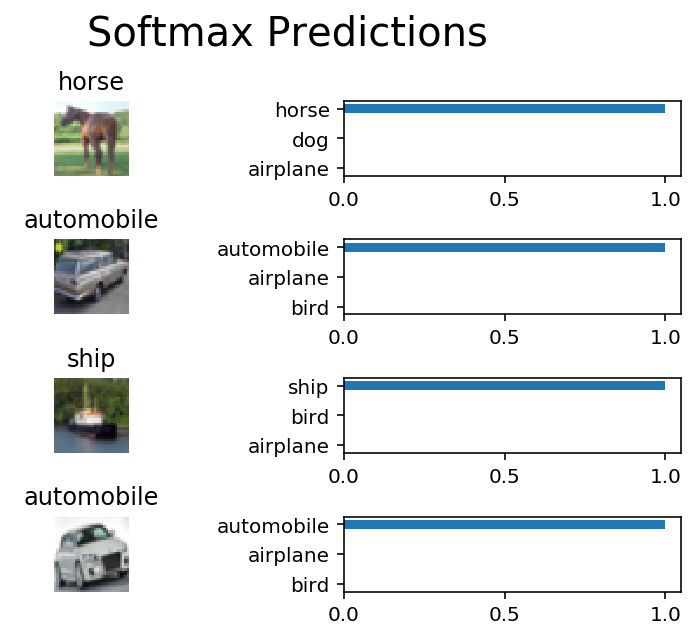

In [18]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import pickle
import helper
import random

# Set batch size if not already set
try:
    if batch_size:
        pass
except NameError:
    batch_size = 64

save_model_path = './image_classification'
n_samples = 4
top_n_predictions = 3

def test_model():
    """
    Test the saved model against the test dataset
    """

    test_features, test_labels = pickle.load(open('preprocess_test.p', mode='rb'))
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for test_feature_batch, test_label_batch in helper.batch_features_labels(test_features, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: test_feature_batch, loaded_y: test_label_batch, loaded_keep_prob: 1.0})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        helper.display_image_predictions(random_test_features, random_test_labels, random_test_predictions)


test_model()

## Why 50-80% Accuracy?
You might be wondering why you can't get an accuracy any higher. First things first, 50% isn't bad for a simple CNN.  Pure guessing would get you 10% accuracy. However, you might notice people are getting scores [well above 80%](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#43494641522d3130).  That's because we haven't taught you all there is to know about neural networks. We still need to cover a few more techniques.
## Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook.  Save the notebook file as "dlnd_image_classification.ipynb" and save it as a HTML file under "File" -> "Download as".  Include the "helper.py" and "problem_unittests.py" files in your submission.